データ準備

In [63]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布の描画

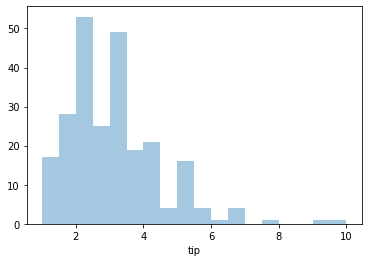

In [65]:

sns.distplot(df['tip'], kde=False)
# ヒストグラム

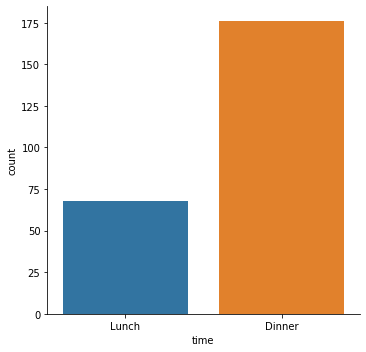

In [66]:
sns.catplot('time', data=df, kind='count')
# 棒グラフ

# 記述統計
データの特徴を記述する（例、平均値　中央値）。標本に興味がある  
例）アンケート調査をした結果、「人生幸せ」と答えた人は７０％だった  

# 推測統計
標本から母集団の特徴を推測する。母集団に興味がある  
例）アンケートの結果を元に、成人の男性の平均年収をいくらか考える   

### 平均値
・平均からの差（偏差（deviation))の合計は０  
・平均値は各値からの差の２乗の合計（平方和）を最小にする  

In [67]:
np.mean(df['tip_rate'])

0.16080258172250478

In [68]:
df['tip_rate'].mean()

0.16080258172250478

In [69]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

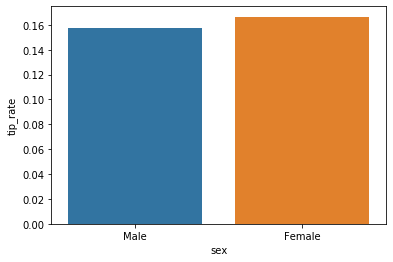

In [70]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

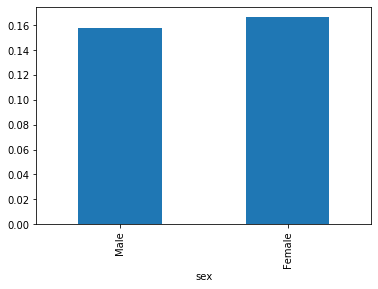

In [71]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## 中央値
・平均値よりも外れ値の値の影響を受けにくい  
・データを大きさ順に並べて際の真ん中の値

In [73]:
np.median(df['tip_rate'])

0.15476977125802577

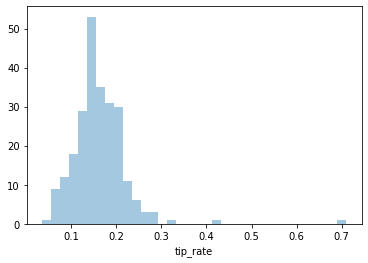

In [74]:
sns.distplot(df['tip_rate'], kde=False)

In [75]:
df['tip_rate'].median()

0.15476977125802577

In [76]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


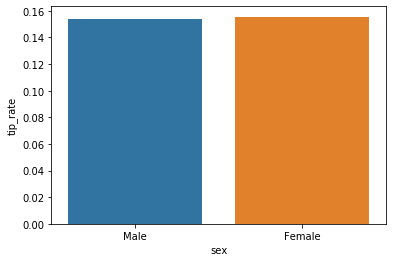

In [78]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [80]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値
・データの中で最も多く観測される値  
・分布の山をモーダル（modal）という

In [86]:
mode, count = stats.mode(df)

In [87]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [89]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

## 範囲

In [93]:
np.min(df['tip'])

1.0

In [94]:
df['tip'].min()

1.0

In [21]:
df.groupby('sex').min()

,total_bill,tip,size,tips_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [95]:
np.max(df['tip'])

10.0

In [100]:
df['tip'].max()

10.0

In [101]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [25]:
df['tip'].max() - df['tip'].min()

9.0

## 四分位数
・データを並べて四分割した値  
・範囲より外れ値に強い  
・quarter(1/4) + quantile(分位数)　＝　四分位数(quartile)  

In [109]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [111]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [112]:
stats.iqr(df['tip_rate'])

0.06234812458689154

In [113]:
stats.iqr(df['tip_rate']) / 2

0.03117406229344577

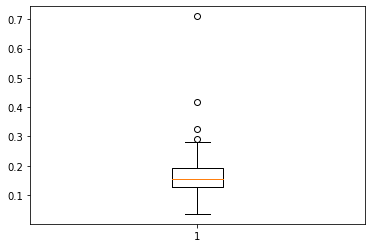

In [115]:
plt.boxplot(df['tip_rate'])
plt.show()

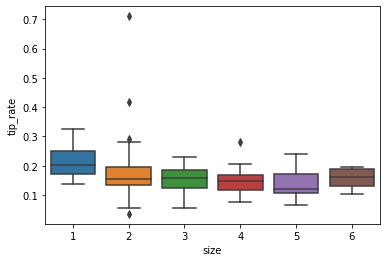

In [120]:
sns.boxplot(x='size', y='tip_rate', data=df)

## 平均偏差（MD mean deviation）
平均または中央値からの偏差の絶対値の平均。  
全てのデータを扱うので、範囲や四部位数より散布度として適している.  
絶対値は扱いにくいので二乗して使うことが多い 

## 分散（Variance）
#### 統計学では絶対値は嫌われる傾向にある

・平均からの偏差の二乗の平均。  
・全てのデータを扱うので、範囲や四分位数より散布度としては適している。  
・通常標本の分散s2、母集団の分散はα２で表す。  
・ｎではなくnー１で割る不偏分散もよく使われている。  
・二乗するため尺度がずれてしまうのが問題。なので平方根（√）をとる。これを標準偏差という  

## 標準偏差（standard deviation）

・平均からの偏差の二乗の平均の平方根（分散の平方根）  
・全ての「データを扱うので、範囲や四分位数より散布度としては適している  
・通常標本の標準偏差はs、母集団の標準偏差はσで表す  
））散布度でよく使われるのは分散と標準偏差  
・平均±s ＝　約２/3 平均±２s ＝　約９５％　　平均±３s ＝　約９９〜１００％　  
つまり平均　± 分散　の中には大体データの３分の2入っていると考えてよい

# 分散

In [139]:
np.var(df['tip'])

1.9066085124966428

# 標準偏差

In [141]:
np.std(df['tip'])

1.3807999538298958

In [138]:
np.sqrt(np.var(df['tip']))

1.3807999538298958